# 2. 이미지 분류 및 학습

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/cnn_project/SOLUX/images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길1.jpg
/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길2.jpg
/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길3.jpg
/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길4.jpg
/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길5.jpg
/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길6.jpg
/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길7.jpg
/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길8.jpg
/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길9.jpg
/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길10.jpg
/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길11.jpg
/content/gdrive/MyD

### 디렉토리와 jpeg 파일명을 읽어서 파일의 절대경로 위치와 학습/테스트 데이터 셋 여부, 해당 이미지의 label 값을 설정

In [ ]:
paths = []
dataset_gubuns = []
label_gubuns = []
# os.walk()를 이용하여 특정 디렉토리 밑에 있는 모든 하위 디렉토리를 모두 조사. 
# cat-and-dog 하위 디렉토리 밑에 jpg 확장자를 가진 파일이 모두 이미지 파일임
# cat-and-dog 밑으로 /train/, /test/ 하위 디렉토리 존재(학습, 테스트 용 이미지 파일들을 가짐)

for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/cnn_project/SOLUX/images'):
    for filename in filenames:
        # 이미지 파일이 아닌 파일도 해당 디렉토리에 있음.
        if '.jpg' in filename:
            # 파일의 절대 경로를 file_path 변수에 할당. 
            file_path = dirname+'/'+ filename
            paths.append(file_path)
            # 파일의 절대 경로에 training_set, test_set가 포함되어 있으면 데이터 세트 구분을 'train'과 'test'로 분류. 
            if '/training_set/' in file_path:
                dataset_gubuns.append('train')  
            elif '/test_set/' in file_path:
                dataset_gubuns.append('test')
            else: dataset_gubuns.append('N/A')
            
            # 파일의 절대 경로에 safe_place가 있을 경우 해당 파일은 SAFE 이미지 파일이고, dangerous_place일 경우는 DANGEROUS 이미지 파일임. 
            if 'safe_place' in file_path:
                label_gubuns.append('SAFE')
            elif 'dangerous_place' in file_path:
                label_gubuns.append('DANGEROUS')
            else: label_gubuns.append('N/A')

In [ ]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError
from PIL import Image

# 이미지 파일 형식 처리
for img_p in paths:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [ ]:
paths[:10] , dataset_gubuns[:10], label_gubuns[:10]

(['/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길1.jpg',
  '/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길2.jpg',
  '/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길3.jpg',
  '/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길4.jpg',
  '/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길5.jpg',
  '/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길6.jpg',
  '/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길7.jpg',
  '/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길8.jpg',
  '/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길9.jpg',
  '/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길10.jpg'],
 ['test',
  'test',
  'test',
  'test',
  'test',
  'test'

### 위에서 생성된 이미지 파일의 절대 경로, 데이터 세트 구분, Lable값을 DataFrame으로 생성. 

In [ ]:
pd.set_option('display.max_colwidth', 200)

data_df = pd.DataFrame({'path':paths, 'dataset':dataset_gubuns, 'label':label_gubuns})
print('data_df shape:', data_df.shape)
data_df.head(10)

data_df shape: (1633, 3)


,path,dataset,label
0,/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길1.jpg,test,DANGEROUS
1,/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길2.jpg,test,DANGEROUS
2,/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길3.jpg,test,DANGEROUS
3,/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길4.jpg,test,DANGEROUS
4,/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길5.jpg,test,DANGEROUS
5,/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길6.jpg,test,DANGEROUS
6,/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길7.jpg,test,DANGEROUS
7,/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길8.jpg,test,DANGEROUS
8,/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길9.jpg,test,DANGEROUS
9,/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길10.jpg,test,DANGEROUS


In [ ]:
# 데이터 세트값 분포 및 Label 값 분포를 확인한다. 
print(data_df['dataset'].value_counts())
print(data_df['label'].value_counts())

test     1200
train     433
Name: dataset, dtype: int64
SAFE         999
DANGEROUS    634
Name: label, dtype: int64


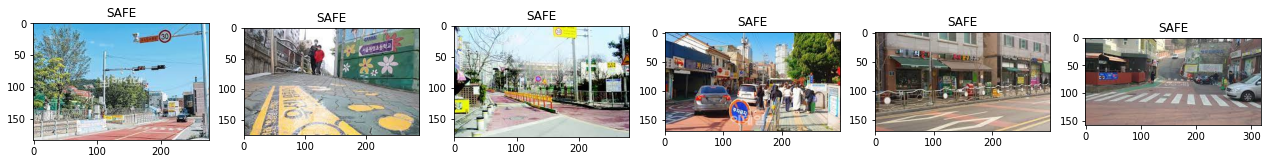

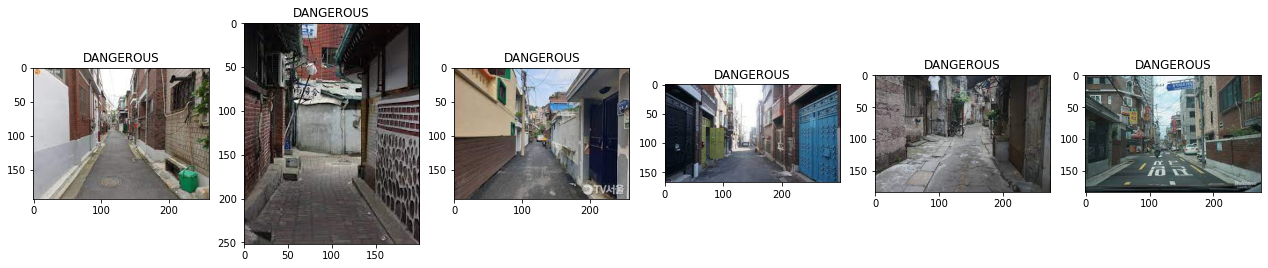

In [ ]:
# SAFE와 DANGEROUS의 이미지 파일 절대 경로를 cv2.imread()로 읽어서 image array로 로드하고 이미지 시각화
# 이미지별로 서로 다른 이미지 사이즈를 가지고 있음. 
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 

def show_grid_images(image_path_list, ncols=8, augmentor=None, title=None):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
        axs[i].imshow(image)
        axs[i].set_title(title)  
        
safe_image_list = data_df[data_df['label']=='SAFE']['path'].iloc[:6].tolist()
show_grid_images(safe_image_list, ncols=6, title='SAFE')

dangerous_image_list = data_df[data_df['label']=='DANGEROUS']['path'].iloc[:6].tolist()
show_grid_images(dangerous_image_list, ncols=6, title='DANGEROUS')

In [ ]:
for image_path in safe_image_list:
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    print('image shape:', image.shape)
    
print('image height shape:', image[:, 0, 0].shape)
print('image width shape:', image[0, :, 0].shape)
print('image size:', image[:, :, 0].shape)

print('### image array:\n', image)

image shape: (183, 275, 3)
image shape: (176, 287, 3)
image shape: (179, 282, 3)
image shape: (168, 300, 3)
image shape: (168, 300, 3)
image shape: (159, 318, 3)
image height shape: (159,)
image width shape: (318,)
image size: (159, 318)
### image array:
 [[[160 155 151]
  [159 156 151]
  [159 156 151]
  ...
  [116 102 102]
  [114 102 104]
  [113 101 103]]

 [[160 155 151]
  [159 156 151]
  [157 156 151]
  ...
  [116 102 102]
  [115 100 103]
  [113 101 103]]

 [[159 156 149]
  [157 157 149]
  [157 156 151]
  ...
  [116 100 101]
  [115  99 102]
  [114  99 102]]

 ...

 [[151 120 117]
  [151 120 117]
  [151 120 117]
  ...
  [152 131 126]
  [151 130 125]
  [151 130 125]]

 [[149 119 119]
  [148 120 117]
  [149 119 119]
  ...
  [160 139 134]
  [159 138 133]
  [159 138 133]]

 [[147 118 120]
  [145 119 118]
  [147 118 120]
  ...
  [163 142 137]
  [162 141 136]
  [162 141 136]]]


### Preprocessing 과 Data Loading 메커니즘
* (초기) Keras는 Preprocessing과 Data Loading을 ImageDataGenerator 객체와 model의 fit_generator()가 상호 연결되어 수행. 
* model의 fit_generator()가 인자로 ImageDataGenerator가 생성한 generator 객체를 입력 받아서 image 파일부터 Model에 array/Tensor값 입력까지 Pipeline Stream으로 이어지게 구성. 
* generator 를 통해서 model에 Tensor로 공급하는 로직은 아래와 같음. 
* image 파일을 image array로 로드-> preprocessing 적용(augmentation -> array 값 scale 조정(0~1사이 값) -> array 크기 resize-> Normalization 적용)
* Label값 인코딩(문자열을 단일 숫자값/원-핫 인코딩) 또한 generator기반으로 손쉽게 변경해줌.
* 실제 Preprocessing과 Data Loading은 Model에서 fit_generator()를 호출하기 전까지는 수행되지 않음. 


### Preprocessing
* image file을 image array로 변환 시 0 ~ 1사이의 float형(float32)으로 변경. 
* image array size를 고정 크기로 재 조정.(예를 들어 224 x 224 )
* augmentation 적용.
* Normalization(평균과 표준 편차 재 조정)
* Label값은 binary classification 이냐 multiple classification에 따라 숫자형 값 Encoding. 
* multiple classification일 경우 Label Encoding을 One-hot encoding 할 지 결정. 

### Data Loading
* os에 있는 image 파일을 메모리로 array 형태로 로딩. 
* 이때 대량의 image 파일을 메모리로 loading 할 경우 메모리가 감당할 수 없으므로 일정 크기 단위로 array 변환. 즉 BATCH 크기 단위로 array 로딩. 

### ImageDataGenerator 객체와 flow_from_dataframe()
* flow_from_dataframe()도 flow_from_directory()와 유사하게 메타 데이터 소스로 부터 이미지 파일과 label을 numpy array로 로드
* flow_from_dataframe()은 DataFrame 메타 데이터로 부터 로드함. 
* 일반적으로 flow_from_dataframe()이 데이터 조작등이 더 편하기 때문에 flow_from_directory() 보다 더 애용됨. 

### 이미지 파일의 절대경로 위치와 데이터세트 유형, label값을 가지는 메타 테이블용 DataFrame을 생성. 

In [ ]:
pd.set_option('display.max_colwidth', 200)

data_df = pd.DataFrame({'path':paths, 'dataset':dataset_gubuns, 'label':label_gubuns})
print(data_df['dataset'].value_counts())
data_df.head(10)

test     1200
train     433
Name: dataset, dtype: int64


,path,dataset,label
0,/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길1.jpg,test,DANGEROUS
1,/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길2.jpg,test,DANGEROUS
2,/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길3.jpg,test,DANGEROUS
3,/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길4.jpg,test,DANGEROUS
4,/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길5.jpg,test,DANGEROUS
5,/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길6.jpg,test,DANGEROUS
6,/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길7.jpg,test,DANGEROUS
7,/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길8.jpg,test,DANGEROUS
8,/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길9.jpg,test,DANGEROUS
9,/content/gdrive/MyDrive/cnn_project/SOLUX/images/test_set/dangerous_place/골목길10.jpg,test,DANGEROUS


### 학습용/검증용/테스트용 DataFrame 을 생성

In [ ]:
data_df['dataset']=='train'

0       False
1       False
2       False
3       False
4       False
        ...  
1628     True
1629     True
1630     True
1631     True
1632     True
Name: dataset, Length: 1633, dtype: bool

In [ ]:
train_df = data_df[data_df['dataset']=='train']
test_df = data_df[data_df['dataset']=='test']
print('train_df shape:', train_df.shape, 'test_df shape:', test_df.shape)

train_df shape: (433, 3) test_df shape: (1200, 3)


In [ ]:
from sklearn.model_selection import train_test_split

# scikit learn의 train_test_split()을 이용하여 train용, validation용 DataFrame을 생성
# stratify를 이용하여 label 값을 균등하게 분할 
tr_df, val_df = train_test_split(train_df, test_size=0.15, stratify=train_df['label'], random_state=2021)
print('tr_df shape:', tr_df.shape, 'val_df shape:', val_df.shape)
print('tr_df label distribution:\n', tr_df['label'].value_counts())
print('val_df label distributuion:\n', val_df['label'].value_counts())

tr_df shape: (368, 3) val_df shape: (65, 3)
tr_df label distribution:
 SAFE         339
DANGEROUS     29
Name: label, dtype: int64
val_df label distributuion:
 SAFE         60
DANGEROUS     5
Name: label, dtype: int64


### 학습과 검증용 ImageDataGenerator 생성.
* flow_from_dataframe()은 인자로 dataframe = 메타 데이터용 DataFrame 입력 받음. 
* x_col은 메타 데이터용 DataFrame에서 image 파일의 절대경로 위치를 나타내는 column명을 의미
* y_col은 메타 데이터용 DataFrame에서 label값 column명을 의미. 이 때 y_col로 지정된 컬럼은 반드시 문자열(object type)이 되어야 함. 
* y_col의 경우 미리 encoding(label 또는 원핫)을 해서 숫자값으로 절대 변경하면 안됨.  
*  softmax가 아닌 sigmoid로 최종 출력하므로 class_mode='binary' 로 Label 데이터 변환, 이미지 array는 224 x 224 로 변경. Batch 크기는 64로 설정. 

In [ ]:
# IMAGE 크기와 BATCH 크기를 위한 환경 변수 설정. 
IMAGE_SIZE = 224
BATCH_SIZE = 64

### 학습용 ImageDataGenerator 생성과 Data generator 처리

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 학습용과 검증용 ImageDataGenerator 생성. 학습용은 augmentation + rescale적용. 검증용은 rescale만 적용 
# augmentation은 horizontal_flip(좌우 반전)만 적용하고 0 ~ 255의 pixel값을 0 ~ 1 로 scale만 적용. 
tr_generator = ImageDataGenerator(horizontal_flip=True, rescale=1/255.)

# ImageDataGenerator 객체의 flow_from_dataframe()) 메소드를 호출. 
# flow_from_dataframe()은 인자로 dataframe = 메타 데이터용 DataFrame 입력 받음. 
# x_col은 메타 데이터용 DataFrame에서 image 파일의 절대경로 위치를 나타내는 column명을 의미
# y_col은 메타 데이터용 DataFrame에서 label값 column명을 의미. 이 때 y_col로 지정된 컬럼은 반드시 문자열(object type)이 되어야 함. 
# y_col의 경우 미리 encoding(label 또는 원핫)을 해서 숫자값으로 절대 변경하면 안됨.  
# softmax가 아닌 sigmoid로 최종 출력하므로 class_mode='binary' 로 Label 데이터 변환, 이미지 array는 224 x 224 로 변경. Batch 크기는 64로 설정. 
tr_flow_gen = tr_generator.flow_from_dataframe(dataframe=tr_df # image file이 있는 디렉토리
                                      ,x_col='path'
                                      ,y_col='label'
                                      ,target_size=(IMAGE_SIZE, IMAGE_SIZE) # 원본 이미지를 최종 resize할 image size
                                      ,class_mode='binary' # 문자열 label을 자동 Encoding. 
                                      ,batch_size=BATCH_SIZE
                                      ,shuffle=True
                                      )

Found 368 validated image filenames belonging to 2 classes.


In [ ]:
images_array = next(tr_flow_gen)[0]
labels_array = next(tr_flow_gen)[1]
print('##### image array shape:', images_array.shape)
print('#### label array shape:', labels_array.shape)

##### image array shape: (64, 224, 224, 3)
#### label array shape: (64,)


### 검증용 ImageDataGenerator 생성과 Data generator 처리



In [ ]:
# 검증용 ImageDataGenerator는 rescale만 적용. 
val_generator = ImageDataGenerator(rescale=1/255.)
val_flow_gen = val_generator.flow_from_dataframe(dataframe=val_df # image file이 있는 디렉토리
                                      ,x_col='path'
                                      ,y_col='label'
                                      ,target_size=(IMAGE_SIZE, IMAGE_SIZE) # 원본 이미지를 최종 resize할 image size
                                      ,class_mode='binary' # 문자열 label을 자동으로 one-hot encoding 시켜줌. 
                                      ,batch_size=BATCH_SIZE
                                      ,shuffle=False
                                      )

Found 65 validated image filenames belonging to 2 classes.


### 모델 생성

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception

def create_model(model_name='vgg16', verbose=False):
    
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        base_model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        base_model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        base_model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    
    bm_output = base_model.output

    x = GlobalAveragePooling2D()(bm_output)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(10, activation='relu', name='fc1')(x)
    # 최종 output 출력을 softmax에서 sigmoid로 변환. 
    output = Dense(1, activation='sigmoid', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
        
    return model

In [ ]:
model = create_model(model_name='xception')
# 최종 output 출력을 softmax에서 sigmoid로 변환되었으므로 binary_crossentropy로 변환 
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 3번 iteration내에 validation loss가 향상되지 않으면 learning rate을 기존 learning rate * 0.2로 줄임.  
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, mode='min', verbose=1)
# 5번 iteration내에 validation loss가 향상되지 않으면 더 이상 학습하지 않고 종료
ely_cb = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

### fit() 또는 fit_generator() 호출하여 학습 수행.
* validation_data에는 앞에서 검증용으로 생성한 val_generator를 입력
* validation_steps는 검증용 데이터에 대한 steps_per_epoch임. 

In [ ]:
# 학습과 검증용 steps_per_epoch 계산 
model.fit(tr_flow_gen, epochs=20,
          steps_per_epoch=int(np.ceil(tr_df.shape[0]/BATCH_SIZE)),
          validation_data=val_flow_gen, 
          validation_steps=int(np.ceil(val_df.shape[0]/BATCH_SIZE)), 
          callbacks=[rlr_cb, ely_cb])

Epoch 1/20
6/6 [==============================] - 282s 48s/step - loss: 0.3156 - accuracy: 0.9103 - val_loss: 0.3727 - val_accuracy: 0.9231
Epoch 2/20
6/6 [==============================] - 276s 46s/step - loss: 0.0243 - accuracy: 0.9973 - val_loss: 0.0670 - val_accuracy: 0.9692
Epoch 3/20
6/6 [==============================] - 278s 46s/step - loss: 0.0105 - accuracy: 0.9973 - val_loss: 1.1884e-06 - val_accuracy: 1.0000
Epoch 4/20
6/6 [==============================] - 283s 47s/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 4.0631e-08 - val_accuracy: 1.0000
Epoch 5/20
6/6 [==============================] - 278s 49s/step - loss: 0.0184 - accuracy: 0.9946 - val_loss: 8.9570e-09 - val_accuracy: 1.0000
Epoch 6/20
6/6 [==============================] - 279s 46s/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 0.9846

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 7/20
6/6 [==============================] - 278s 46s/step - 

In [ ]:
# 학습한 모델 저장
model.save("classification.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
# 모델 불러오기
from tensorflow.keras.models import load_model
model = load_model('classification.h5')

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

### 테스트용 ImageDataGenerator 생성과 Data generator 처리 후 Evaluation 수행

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# test data는 augmentation을 적용할 필요 없음. 
test_generator = ImageDataGenerator(rescale=1/255.)
test_flow_gen = test_generator.flow_from_dataframe(dataframe=test_df # image file이 있는 디렉토리
                                      ,x_col='path'
                                      ,y_col='label'
                                      ,target_size=(IMAGE_SIZE, IMAGE_SIZE) # 원본 이미지를 최종 resize할 image size
                                      ,class_mode='binary' # 문자열 label을 자동으로 encoding. 
                                      ,batch_size=BATCH_SIZE
                                      ,shuffle=False
                                      )
# evaluation으로 성능 검증
model.evaluate(test_flow_gen)

Found 1200 validated image filenames belonging to 2 classes.
19/19 [==============================] - 188s 10s/step - loss: 11.1778 - accuracy: 0.5208


[11.177753448486328, 0.5208333134651184]

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(224, 224))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a danger")
  else:
    print(fn + " is a safe")

Saving safe_place_학교앞_0_307.jpg to safe_place_학교앞_0_307 (2).jpg
Saving safe_place_학교앞_0_311.jpg to safe_place_학교앞_0_311 (2).jpg
Saving safe_place_학교앞_0_327.jpg to safe_place_학교앞_0_327 (2).jpg
Saving safe_place_학교앞_0_333.jpg to safe_place_학교앞_0_333 (2).jpg
Saving safe_place_학교앞_0_336.jpg to safe_place_학교앞_0_336 (2).jpg
[0.]
safe_place_학교앞_0_307.jpg is a safe
[0.]
safe_place_학교앞_0_311.jpg is a safe
[0.]
safe_place_학교앞_0_327.jpg is a safe
[0.]
safe_place_학교앞_0_333.jpg is a safe
[0.]
safe_place_학교앞_0_336.jpg is a safe


# 3. 사용자 이미지 분석

In [ ]:
from tkinter import *
from PIL import ImageTk, Image
from tkinter import filedialog
import tkinter.font as tkFont

root = Tk()
root.title('사진 선택') # 프레임/윈도우/창에 제목
root.geometry("600x400") # 가로 x 세로
#root.configure(bg='light blue')
#root.resizable(False, False)

def open():
    global my_image
    root.filename = filedialog.askopenfilename(initialdir='./png', title='파일선택', filetypes=(('png files', '*.png'), ('jpg files', '*.jpg'), ('all files', '*.*')))

    #Label(root, text=root.filename).pack()
    my_image = ImageTk.PhotoImage(Image.open(root.filename))
    Label(left_frame, image=my_image).pack()
    

fontStyle = tkFont.Font(size=25)
Label(root, text="\n이미지 분석을 통한 범죄 가능성 예측\n", font=fontStyle).pack()

left_frame = Frame(root, bd=2, height=300, width=300, padx=50, pady=10)
left_frame.pack(side=LEFT)

right_frame = Frame(root, bd=2, background='white', height=300, width=300, padx=50, pady=10)
right_frame.pack(side='right')

my_btn = Button(left_frame, text = '파일 열기', command=open).pack(padx=10, pady=10)


root.mainloop()

TclError: ignored